In [1]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
univ=pd.read_csv("Universities.csv")
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
#Normalization function
def norm_fun (i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
#normalization data frame (consider the numerical data)
df_norm=norm_fun(univ.iloc[:,1:])
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


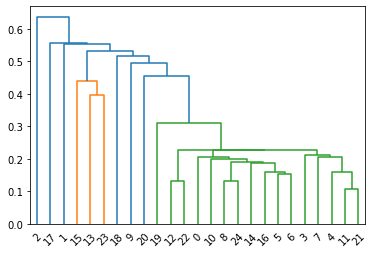

In [5]:
#creat dendrogram
dendrogram0=sch.dendrogram(sch.linkage(df_norm,method='single'))

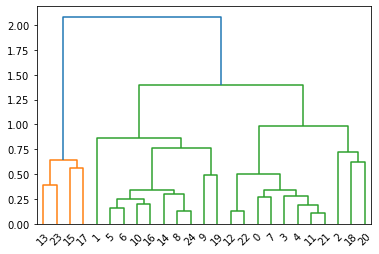

In [8]:
dendrogram1=sch.dendrogram(sch.linkage(df_norm,method='complete'))

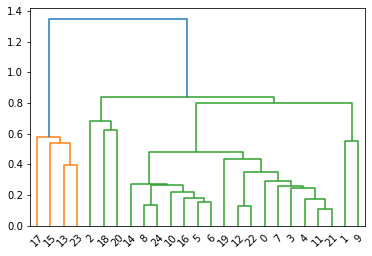

In [9]:
dendrogram2=sch.dendrogram(sch.linkage(df_norm,method='average'))

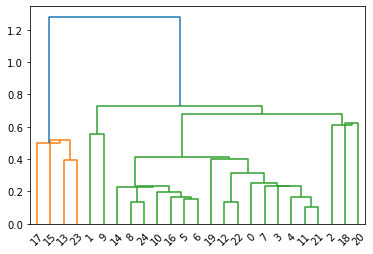

In [10]:
dendrogram3=sch.dendrogram(sch.linkage(df_norm,method='centroid'))

In [12]:
# create cluster
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [14]:
#save cluster for chart
y_hc=hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [18]:
df_norm['h_clusterid']=hc.labels_

In [19]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,3
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,1
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0


In [40]:
df_norm.groupby('h_clusterid')